# DATA FEATURES

M/F: Gender of the patient

Age: Age of the patient

EDUC: Years of education

SES: Socio-economic status (rating between 1-5)

MMSE: Mini mental state examination score

CDR: Clinical dementia rating

eTIV: Estimated total intracranial volume

nWBV: Normalize whole brain volume

ASF: Atlas scaling factor

Group: (TARGET VARIABLE) Demented or Nondemented

# IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d # used in 3D plotting
import matplotlib.pyplot as plt # data visualization
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns #

# EXPLORATORY DATA ANALYSIS

In [3]:
df = pd.read_csv('alzheimer.csv')

In [4]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
df.tail()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,Nondemented,F,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [8]:
null_counts = df.isnull().sum()

print(null_counts)

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


In [9]:
mean_ses = df['SES'].mean()
df['SES'].fillna(mean_ses, inplace=True)

# Replace missing values in MMSE with the median value
median_mmse = df['MMSE'].median()
df['MMSE'].fillna(median_mmse, inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [11]:
null_counts = df.isnull().sum()

print(null_counts)

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64


# CORRELATION MATRIX

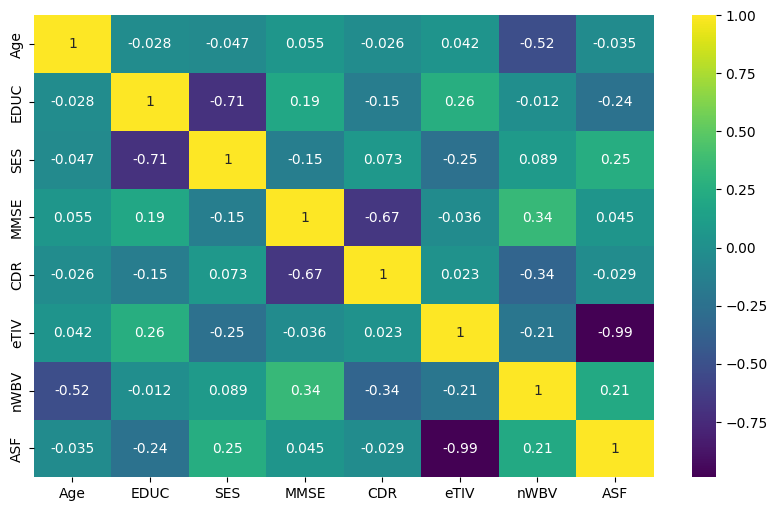

In [12]:
corr = df.corr()
max(corr)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='viridis', annot=True) 
plt.show()

# DATA VISUALIZATIONS

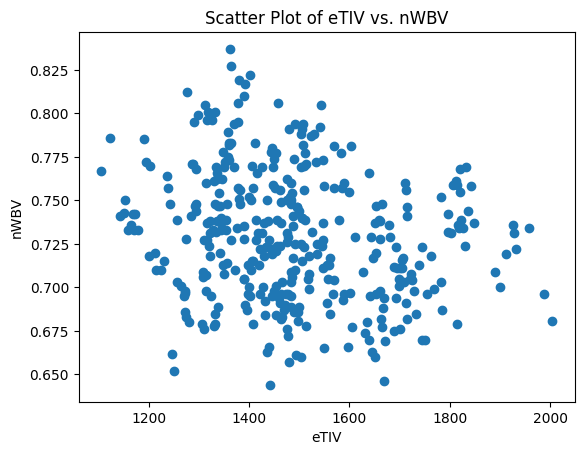

In [30]:
plt.scatter(df['eTIV'], df['nWBV'])
plt.xlabel('eTIV')
plt.ylabel('nWBV')
plt.title('Scatter Plot of eTIV vs. nWBV')
plt.show()

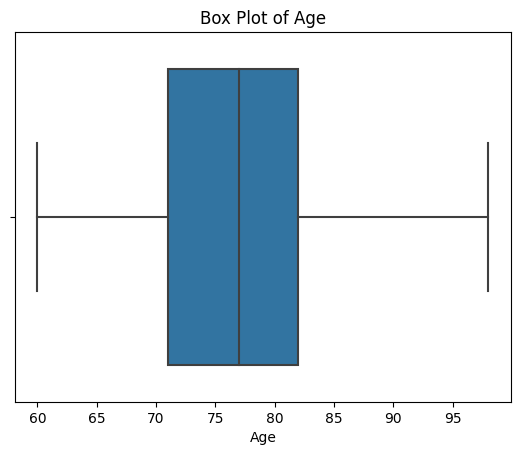

In [33]:
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

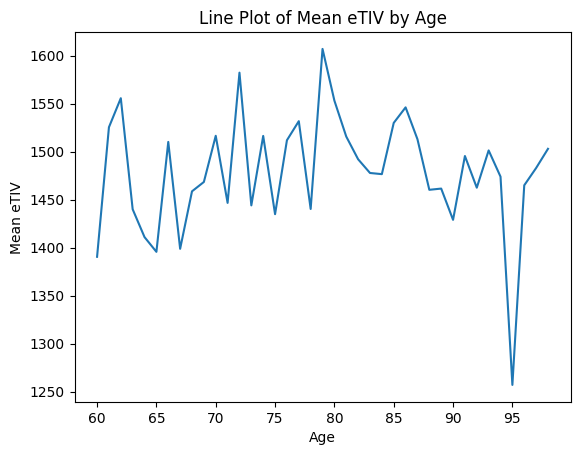

In [36]:


# Group the data by age and calculate the mean eTIV for each age
age_means = df.groupby('Age')['eTIV'].mean()

# Create a line plot of age vs. eTIV
plt.plot(age_means.index, age_means.values)
plt.xlabel('Age')
plt.ylabel('Mean eTIV')
plt.title('Line Plot of Mean eTIV by Age')
plt.show()

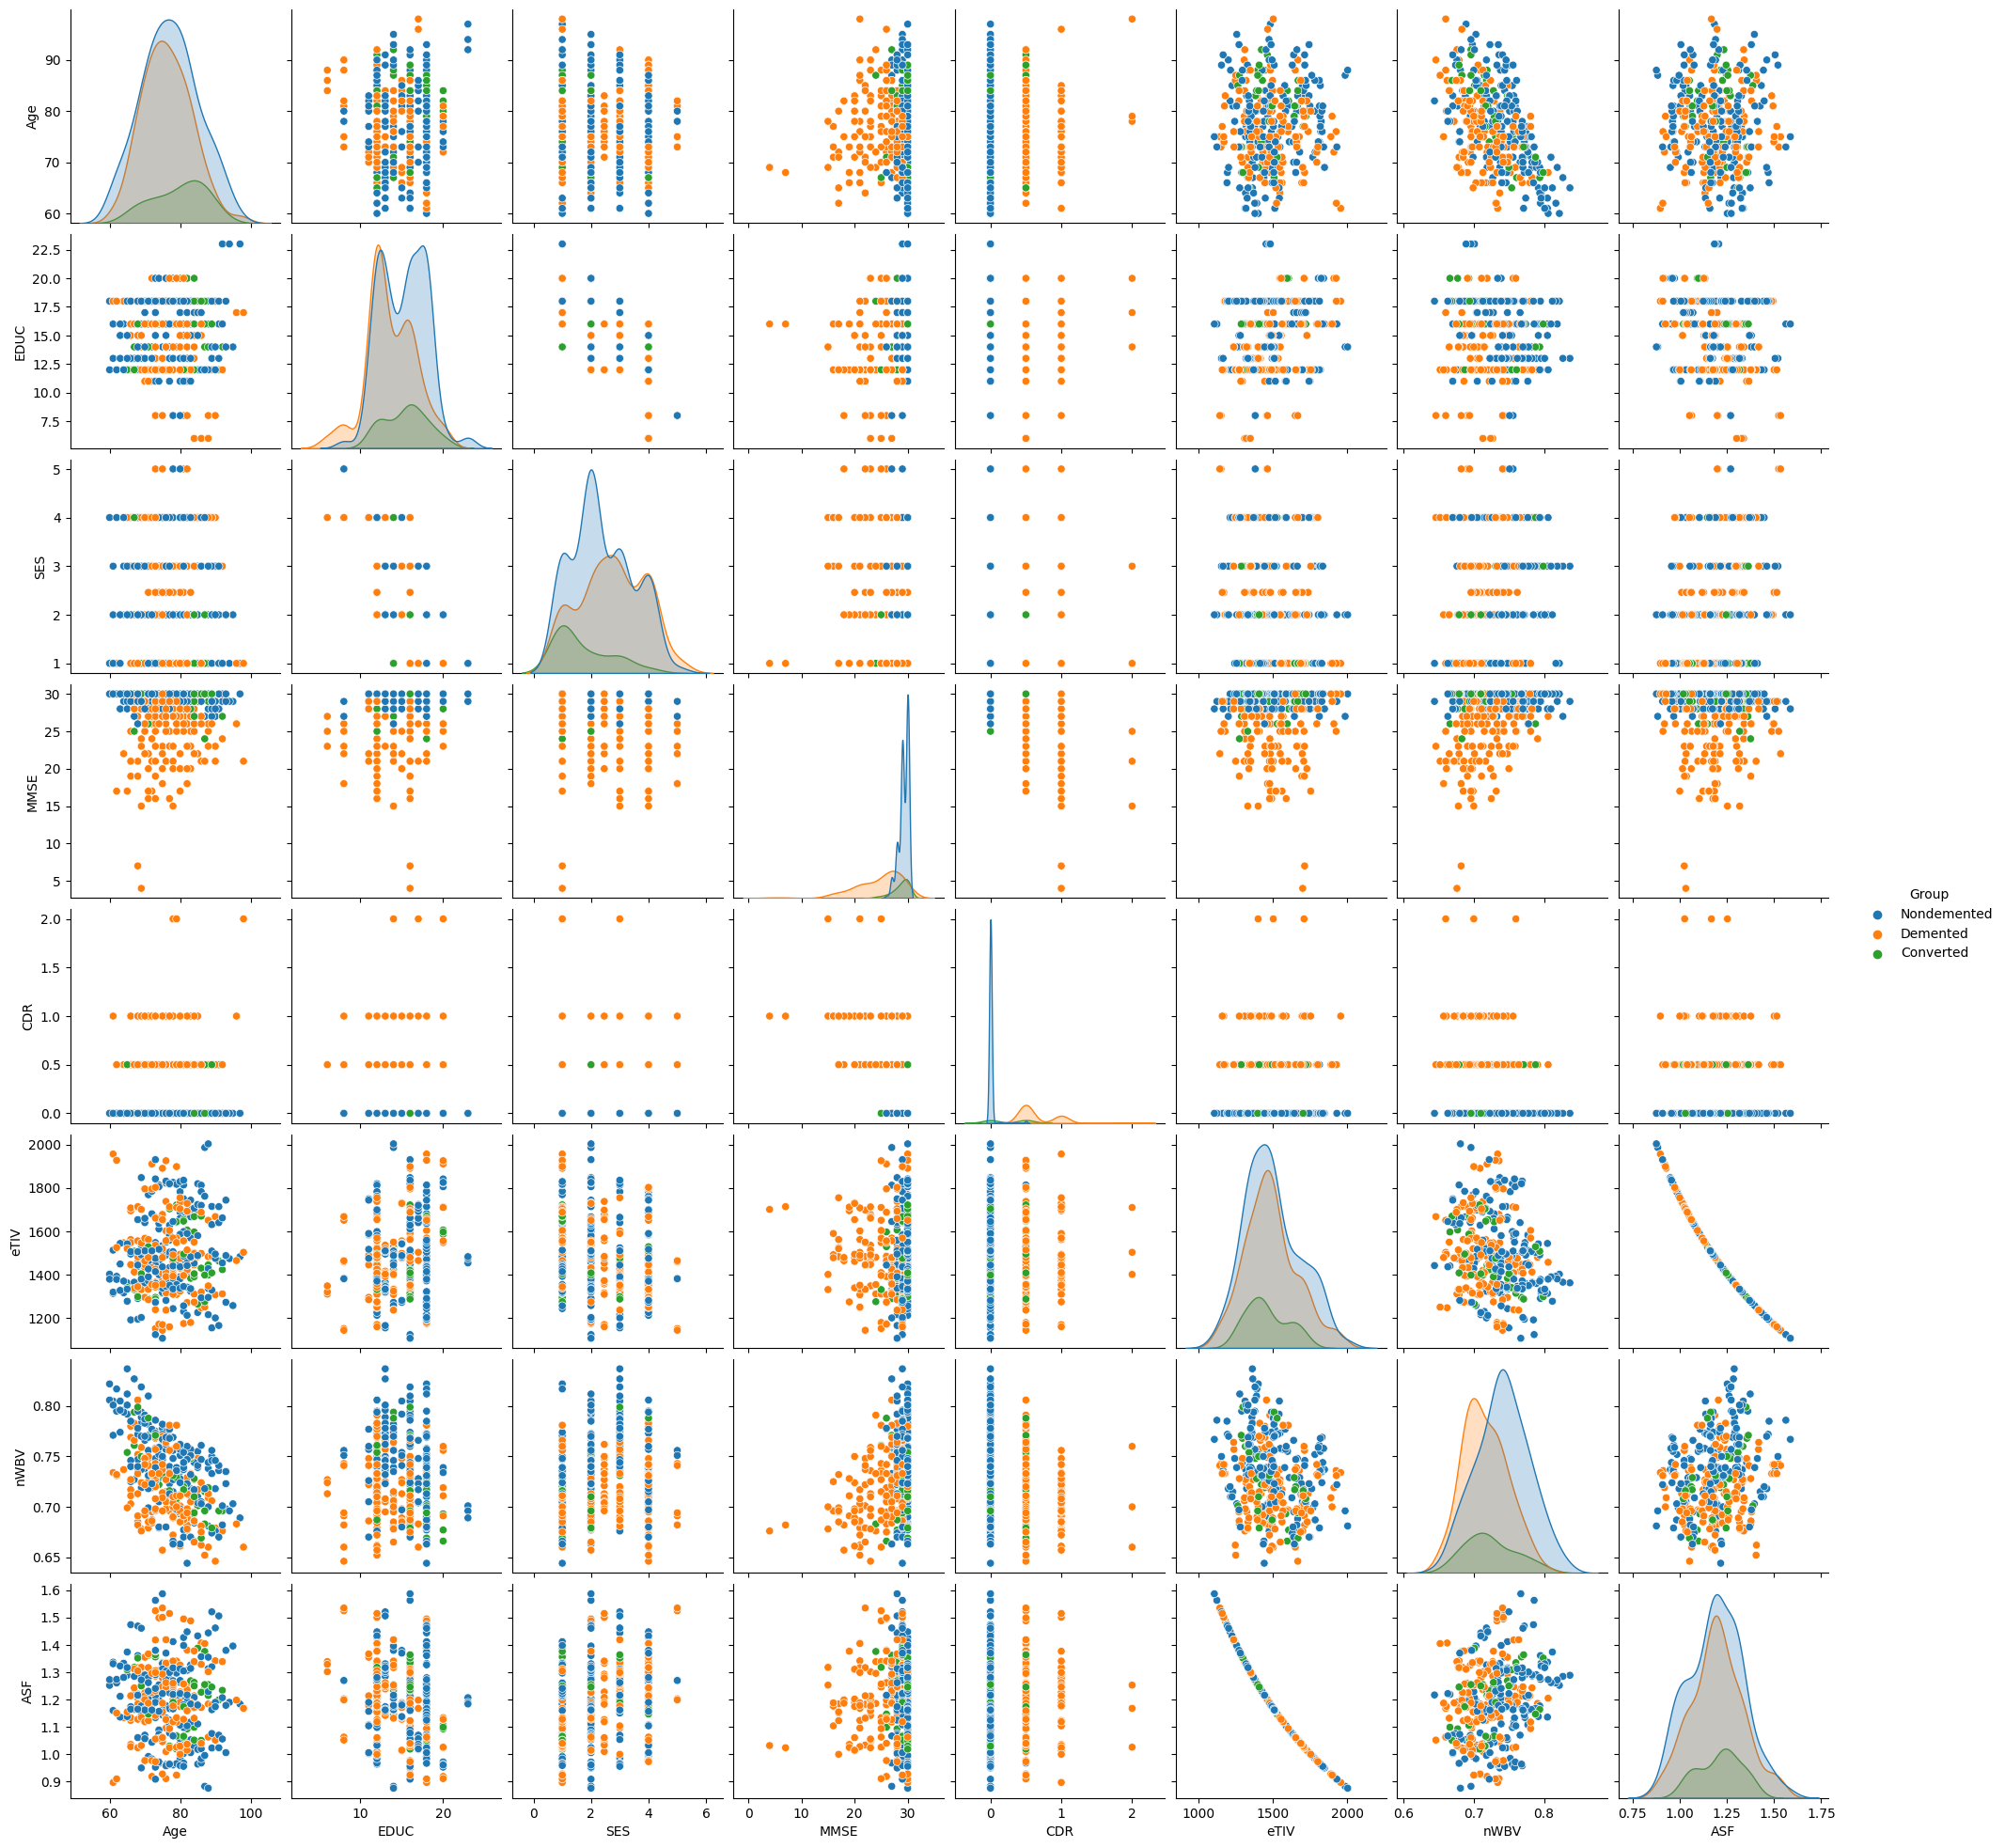

In [13]:
sns.pairplot(df, hue="Group")

# TRAIN TEST SPLITTING

In [14]:
X= df.drop(['Group'], axis=1)
y = df['Group']

In [15]:
!pip install category_encoders==2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     373 non-null    object 
 1   Age     373 non-null    int64  
 2   EDUC    373 non-null    int64  
 3   SES     373 non-null    float64
 4   MMSE    373 non-null    float64
 5   CDR     373 non-null    float64
 6   eTIV    373 non-null    int64  
 7   nWBV    373 non-null    float64
 8   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 26.4+ KB


In [23]:
import category_encoders as ce
cols_to_encode = ['M/F']

# Create the ordinal encoder
encoder = ce.OrdinalEncoder(cols=cols_to_encode)

# Fit and transform the training data
X = encoder.fit_transform(X)

# Transform the test data using the trained encoder
X = encoder.transform(X)

# View the encoded data
X.head()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,-1.0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,-1.0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,-1.0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,-1.0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,-1.0,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

# CHECKING THE ACCURACY

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9466666666666667


# PICKLING THE MODEL

In [37]:
import pickle
with open('alzi.pkl', 'wb') as files:
    pickle.dump(nb,files)